In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read in dataframe
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
# convert VClass column to categorical datatype

# create list of car classes
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# set list to categorical datatype
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
# set VClass column value to categorical datatype
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [13]:
# create new column with string of just Automatic or Manual
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [14]:
print(fuel_econ.shape)
fuel_econ.head()

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


# Size and Shape

In [16]:
# get random subset of dataframe for scatterplot

# (opt)get same seed as in lesson notes
np.random.seed(2018)

# get non-bootstrapped 
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

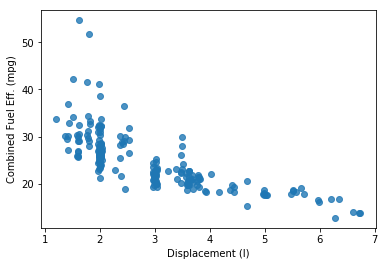

In [17]:
# scatter plot of engine size by combined fuel efficiency
# made more legible by using random subset of data plus jitter
# sns default linear regression curve turned off
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

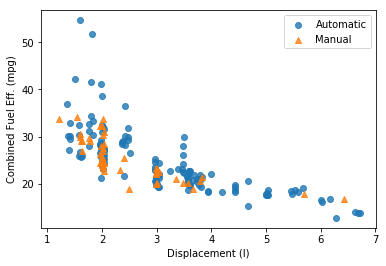

In [29]:
# add transmission type to previous scatter plot

# create list of lists with mapping of levels to symbol types
# use a list of lists rather than a dictionary for finer control over order that the levels are plotted
ttype_markers = [['Automatic', 'o'], # sets as circles
                ['Manual', '^']] # sets as triangles ('s' sets as squares)('x' sets as x's)

# loop over the list elements
# use ttype to select only the plots with the matching transmission type
# set the marker with marker in sns.regplot
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data = plot_data, x = 'displ', y = 'comb',
               x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

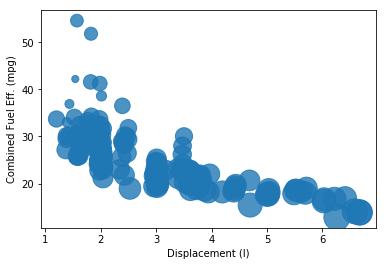

In [23]:
# add CO2 emissions as third variable using marker size
# in matplot lib use 's' parameter for size
# but in regplot need to use a dictionary as part of scatter_kws
# and explicitly assign full series instead of column name
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False,
           scatter_kws = {'s' : fuel_econ_subset['co2']});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');


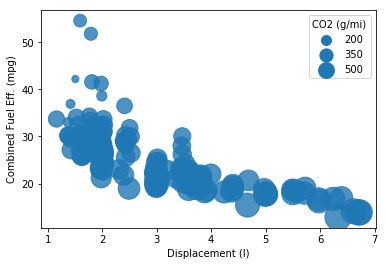

In [27]:
# same plot but with legend for sizes
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False,
           scatter_kws = {'s' : fuel_econ_subset['co2']});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

# create list of sizes
sizes = [200, 350, 500]
# get base color for plot
base_color = sns.color_palette()[0]
# create empty legend list
legend_obj = []
# loop through sizes and add necessary point sizes
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
# first argument is objects to be depicted in the legend, second is the list of labels 
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

# Color

In [31]:
# redo getting random subset of dataframe for following plots
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

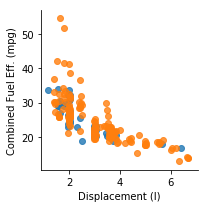

In [33]:
# scatterplot of engine size and combined fuel efficiency by color as transmission type
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'trans_type')
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

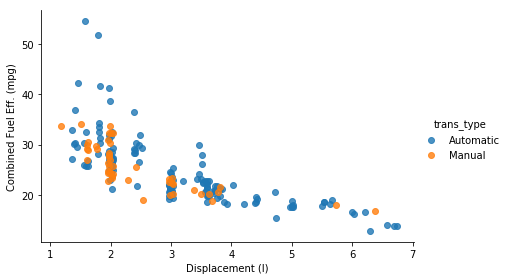

In [39]:
# change order of plot layers using hue_order, and adjust height and aspect ratio of plot to better view
# also add legend
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

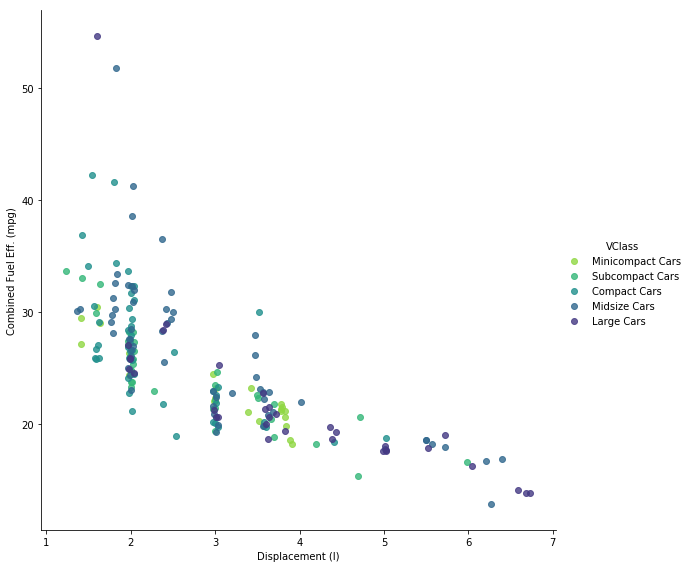

In [44]:
# instead plotting VClass as non-positional variable
# because it's an ordered variable, it's better to use a sequential palatte
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'VClass', height = 8, aspect = 1, palette = 'viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

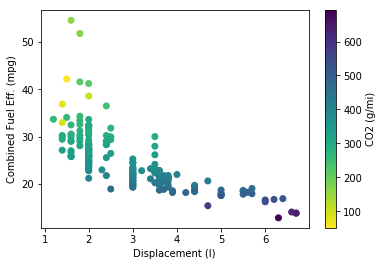

In [47]:
# because Facetgrid only expect categorical variables, need to use plt.scatter for numerical variable like co2
# otherwise would have giant legend for every unique co2 value
# instead use plt.scatter
# use cmap for color palette
# use colorbar and label for legend
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
           cmap = 'viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');